percent of women in the science 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("academic_performance_dataset_V2.csv")

df.head()


,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


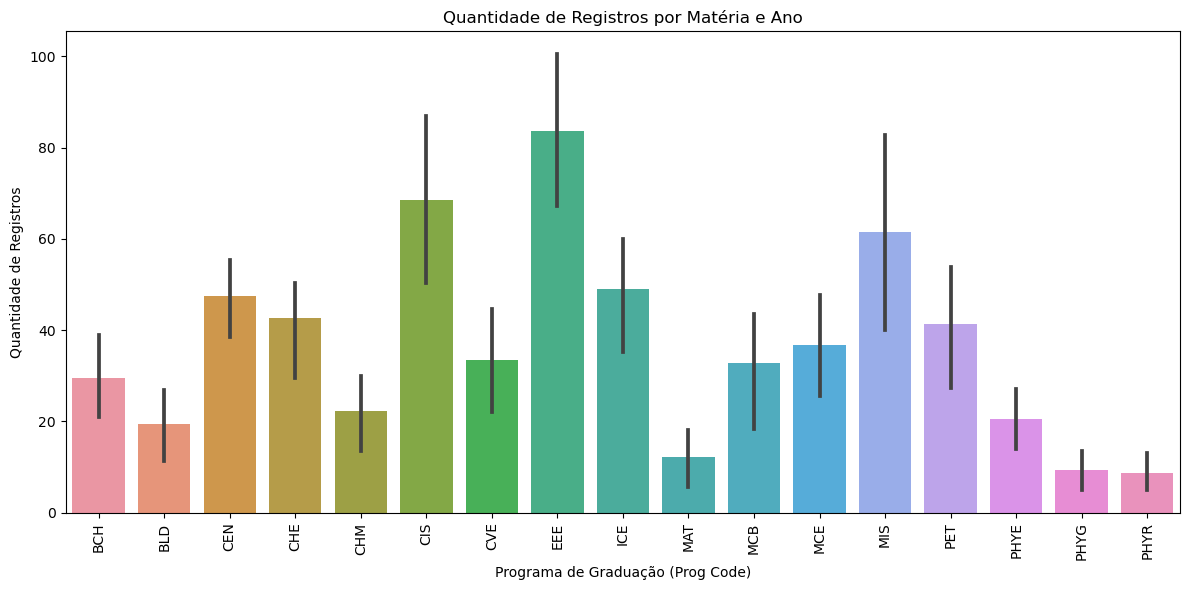

In [4]:
# Contar os dados por 'YoG' e 'Prog Code'
count_by_subject = df.groupby(['YoG', 'Prog Code']).size()

# Resetar o índice para facilitar o gráfico
count_by_subject = count_by_subject.reset_index(name='Count')

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Prog Code', y='Count', data=count_by_subject)

# Rotacionar os rótulos no eixo X para uma melhor visualização
plt.xticks(rotation=90)

# Adicionar título e labels
plt.title('Quantidade de Registros por Matéria e Ano')
plt.xlabel('Programa de Graduação (Prog Code)')
plt.ylabel('Quantidade de Registros')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [5]:
df_sorted = df.sort_values(by=['YoG', 'Prog Code'])
df_sorted

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24
5,51740,BCH,Male,2010,2.97,2.66,2.98,3.28,3.07,3.13
...,...,...,...,...,...,...,...,...,...,...
3004,36589,PHYR,Male,2014,3.25,2.90,3.25,3.20,3.53,1.67
3005,88479,PHYR,Male,2014,3.99,3.92,4.21,3.68,4.41,3.06
3006,30462,PHYR,Male,2014,3.28,3.27,3.37,2.97,3.50,4.51
3007,46237,PHYR,Male,2014,3.30,3.27,3.06,3.35,3.63,3.47


In [6]:
gender_counts = df.groupby(['YoG', 'Prog Code', 'Gender']).size().unstack(fill_value=0)
print(gender_counts)

Gender          Female  Male
YoG  Prog Code              
2010 BCH            10     8
     BLD             3     5
     CEN            19    42
     CHE            21    30
     CHM             5     2
...                ...   ...
2014 MIS            24    20
     PET            19    33
     PHYE            4    14
     PHYG            1     5
     PHYR            0     8

[81 rows x 2 columns]


In [7]:
gender_counts['Female_Percentage'] = (gender_counts['Female'] / (gender_counts['Female'] + gender_counts['Male'])) * 100
print(gender_counts)

Gender          Female  Male  Female_Percentage
YoG  Prog Code                                 
2010 BCH            10     8          55.555556
     BLD             3     5          37.500000
     CEN            19    42          31.147541
     CHE            21    30          41.176471
     CHM             5     2          71.428571
...                ...   ...                ...
2014 MIS            24    20          54.545455
     PET            19    33          36.538462
     PHYE            4    14          22.222222
     PHYG            1     5          16.666667
     PHYR            0     8           0.000000

[81 rows x 3 columns]


In [8]:
# import plotly.graph_objects as go
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output

# df_interactive = gender_counts.reset_index()

# # Inicializar o aplicativo Dash
# app = dash.Dash(__name__)

# # Layout do aplicativo
# app.layout = html.Div([
#     html.H1("Number of Women and Men per Prog Code over the Years", style={'color': 'blue'}),
#     dcc.Dropdown(
#         id='prog-code-dropdown',
#         options=[{'label': prog_code, 'value': prog_code} for prog_code in df_interactive['Prog Code'].unique()],
#         value='BCH',  # valor inicial
#         style={'width': '50%'}
#     ),
#     dcc.Graph(id='line-graph')
# ])

# # Callback para atualizar o gráfico
# @app.callback(
#     Output('line-graph', 'figure'),
#     [Input('prog-code-dropdown', 'value')]
# )
# def update_graph(selected_prog_code):
#     filtered_data = df_interactive[df_interactive['Prog Code'] == selected_prog_code]
    
#     # Criar o gráfico com as linhas de Female e Male
#     fig = go.Figure()

#     fig.add_trace(go.Scatter(
#         x=filtered_data['YoG'],
#         y=filtered_data['Female'],
#         mode='lines+markers',
#         name='Female',
#         line=dict(color='blue')
#     ))

#     fig.add_trace(go.Scatter(
#         x=filtered_data['YoG'],
#         y=filtered_data['Male'],
#         mode='lines+markers',
#         name='Male',
#         line=dict(color='red')
#     ))

#     fig.update_layout(
#         title=f"Number of Women and Men - {selected_prog_code}",
#         xaxis_title="Year",
#         yaxis_title="Quantity"
#     )

#     return fig

# # Rodar o servidor
# if __name__ == '__main__':
#     app.run_server(debug=True)


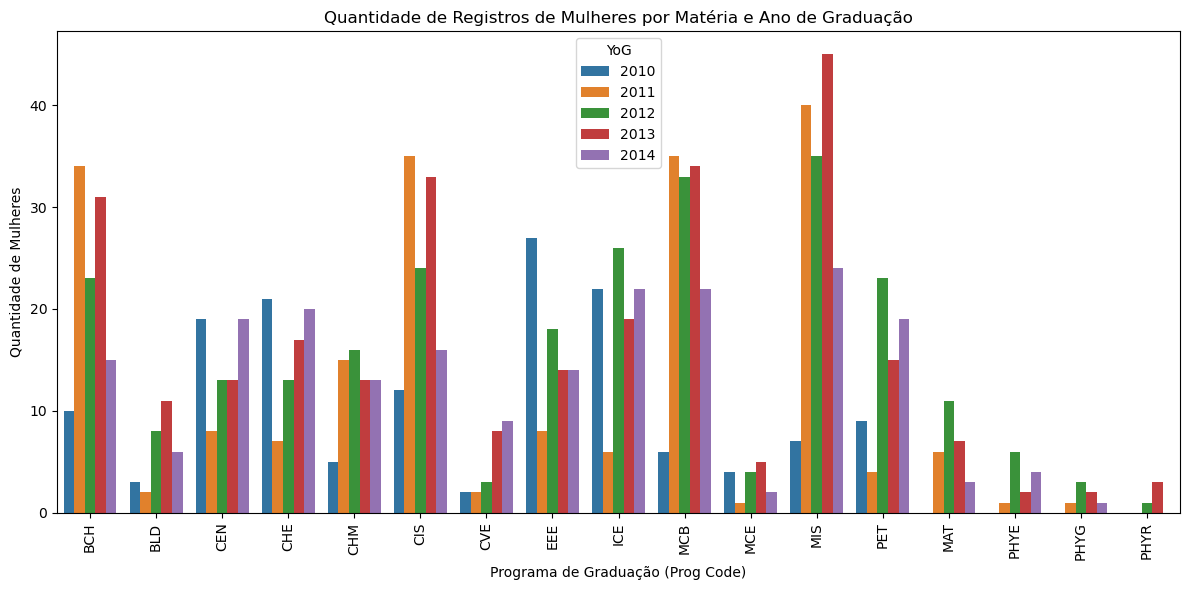

In [9]:
# Filtrar os dados para mulheres
df_female = df[df['Gender'] == 'Female']

# Contar a quantidade de registros por 'YoG', 'Prog Code' e 'Gender'
female_counts = df_female.groupby(['YoG', 'Prog Code']).size().reset_index(name='Count')

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Prog Code', y='Count', hue='YoG', data=female_counts)

# Rotacionar os rótulos no eixo X para uma melhor visualização
plt.xticks(rotation=90)

# Adicionar título e labels
plt.title('Quantidade de Registros de Mulheres por Matéria e Ano de Graduação')
plt.xlabel('Programa de Graduação (Prog Code)')
plt.ylabel('Quantidade de Mulheres')

# Exibir o gráfico
plt.tight_layout()
plt.show()



In [10]:

year_dfs = {}

for year in gender_counts.index.get_level_values('YoG').unique():
    year_data = gender_counts.loc[year]
    
    sorted_year_data = year_data.sort_values(by='Female', ascending=True)
    
    year_dfs[year] = sorted_year_data[['Female']]

# [2010, 2011, 2012, 2013, 2014]
df_2010 = year_dfs[2010]
df_2011 = year_dfs[2011]
df_2012 = year_dfs[2012]
df_2013 = year_dfs[2013]
df_2014 = year_dfs[2014]


2010

In [11]:
df_2010 = df_2010.reset_index()

df_2010

Gender,Prog Code,Female
0,MAT,0
1,CVE,2
2,BLD,3
3,MCE,4
4,CHM,5
5,MCB,6
6,MIS,7
7,PET,9
8,BCH,10
9,CIS,12


2011

In [12]:
df_2011 = df_2011.reset_index()
df_2011

Gender,Prog Code,Female
0,PHYG,1
1,PHYE,1
2,MCE,1
3,BLD,2
4,CVE,2
5,PET,4
6,MAT,6
7,ICE,6
8,CHE,7
9,CEN,8


2012

In [13]:
df_2012 = df_2012.reset_index()
df_2012

Gender,Prog Code,Female
0,PHYR,1
1,CVE,3
2,PHYG,3
3,MCE,4
4,PHYE,6
5,BLD,8
6,MAT,11
7,CHE,13
8,CEN,13
9,CHM,16


2013

In [14]:
df_2013 = df_2013.reset_index()
df_2013

Gender,Prog Code,Female
0,PHYG,2
1,PHYE,2
2,PHYR,3
3,MCE,5
4,MAT,7
5,CVE,8
6,BLD,11
7,CHM,13
8,CEN,13
9,EEE,14


2014

In [15]:
df_2014 = df_2014.reset_index()
df_2014

Gender,Prog Code,Female
0,PHYR,0
1,PHYG,1
2,MCE,2
3,MAT,3
4,PHYE,4
5,BLD,6
6,CVE,9
7,CHM,13
8,EEE,14
9,BCH,15



biology = BCH, MCB
computer science = CEN , CIS , MIS, PHYE
enginering = CHE , CHM , CVE, EEE , ICE , MCE, PET 
tech = BLD, MIS
math et phy = MAT, PHYG, PHYR

In [16]:


# Definindo os tópicos e suas respectivas matérias
topics = {
    'biology': ['BCH', 'MCB'],
    'computer_science': ['CEN', 'CIS', 'MIS', 'PHYE'],
    'engineering': ['CHE', 'CHM', 'CVE', 'EEE', 'ICE', 'MCE', 'PET'],
    'tech': ['BLD', 'MIS'],
    'math_and_phy': ['MAT', 'PHYG', 'PHYR']
}

# Criar um novo DataFrame para armazenar as porcentagens de mulheres por tópico
topic_percentages = {}

# Iterar sobre os tópicos e calcular a porcentagem de mulheres para cada grupo
for topic, subjects in topics.items():
    # Filtra as matérias que pertencem ao tópico
    filtered_data = gender_counts[gender_counts.index.get_level_values('Prog Code').isin(subjects)]
    
    # Calcular a porcentagem de mulheres por ano para esse grupo de matérias
    female_percentage_by_year = filtered_data.groupby('YoG')['Female_Percentage'].mean()
    
    # Adicionar o resultado ao dicionário
    topic_percentages[topic] = female_percentage_by_year

# Criar um DataFrame com as porcentagens para cada tópico
topic_percentage_df = pd.DataFrame(topic_percentages).reset_index()

# Exibir o DataFrame final
topic_percentage_df


,YoG,biology,computer_science,engineering,tech,math_and_phy
0,2010,65.277778,31.351506,32.690440,36.250000,0.000000
1,2011,81.201550,33.275937,26.585668,34.090909,33.928571
2,2012,77.619048,32.840251,29.731397,45.358187,31.269841
3,2013,77.745995,28.515406,25.667664,41.912775,25.101215
4,2014,81.781377,37.581449,34.939435,38.383838,25.555556


e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

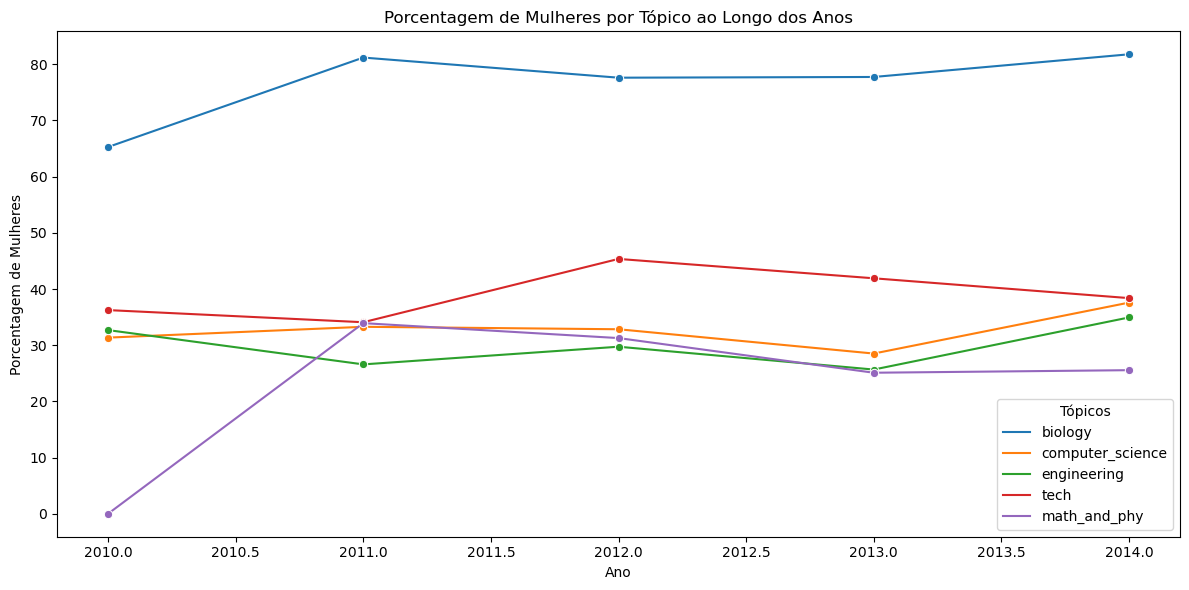

In [17]:

# Convertendo o DataFrame para um formato 'long' para facilitar o plot
topic_percentage_df = topic_percentage_df.reset_index()
topic_percentage_df = topic_percentage_df.melt(id_vars='YoG', 
                                                value_vars=topics.keys(), 
                                                var_name='Topic', 
                                                value_name='Female_Percentage')

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='YoG', y='Female_Percentage', hue='Topic', data=topic_percentage_df, marker='o')

# Adicionando título e rótulos
plt.title('Porcentagem de Mulheres por Tópico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Mulheres')

# Exibindo a legenda
plt.legend(title='Tópicos')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


Biology: BCH, MCB

Math : MAT

Chemistry: CHE, CHM, PET

Physics: PHYE, PHYG, PHYR

Mecanics: CVE, MCE, BLD

Electronics and elctrical: EEE

Information and computer: CEN, CIS, ICE, MIS

In [18]:
# Definindo os tópicos e suas respectivas matérias
topics = {
    'biology': ['BCH', 'MCB'],
    'computer_science': ['CEN', 'CIS', 'ICE'],
    'tech': ['BLD', 'MIS'],
    'math': ['MAT'],
    'physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry' : ['CHE','CHM' ,'PET'],
    'Mecanics' : ['CVE', 'MCE', 'BLD']
}

# Criar um novo DataFrame para armazenar as porcentagens de mulheres por tópico
topic_percentages = {}

# Iterar sobre os tópicos e calcular a porcentagem de mulheres para cada grupo
for topic, subjects in topics.items():
    # Filtra as matérias que pertencem ao tópico
    filtered_data = gender_counts[gender_counts.index.get_level_values('Prog Code').isin(subjects)]
    
    # Calcular a porcentagem de mulheres por ano para esse grupo de matérias
    female_percentage_by_year = filtered_data.groupby('YoG')['Female_Percentage'].mean()
    
    # Adicionar o resultado ao dicionário
    topic_percentages[topic] = female_percentage_by_year

# Criar um DataFrame com as porcentagens para cada tópico
topic_percentage_df = pd.DataFrame(topic_percentages)

# Exibir o DataFrame final
print(topic_percentage_df)

        biology  computer_science       tech       math    physics  Chemistry  \
YoG                                                                             
2010  65.277778         31.325051  36.250000   0.000000        NaN  48.646125   
2011  81.201550         33.891726  34.090909  42.857143  17.500000  39.973803   
2012  77.619048         37.773774  45.358187  52.380952  20.952381  40.315067   
2013  77.745995         29.528478  41.912775  36.842105  15.384615  35.218012   
2014  81.781377         38.898458  38.383838  60.000000  12.962963  52.334716   

       Mecanics  
YoG              
2010  20.526756  
2011  13.040663  
2012  19.376968  
2013  20.020425  
2014  16.311782  


e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\Anaconda\envs\data_visual\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

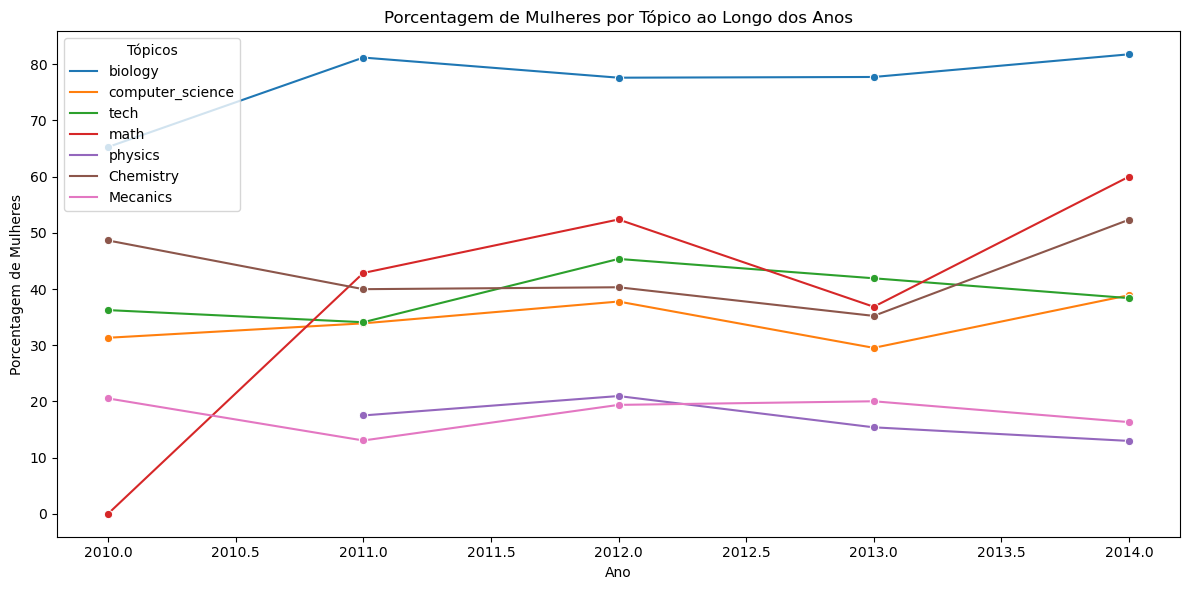

In [19]:

# Convertendo o DataFrame para um formato 'long' para facilitar o plot
topic_percentage_df = topic_percentage_df.reset_index()
topic_percentage_df = topic_percentage_df.melt(id_vars='YoG', 
                                                value_vars=topics.keys(), 
                                                var_name='Topic', 
                                                value_name='Female_Percentage')

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='YoG', y='Female_Percentage', hue='Topic', data=topic_percentage_df, marker='o')

# Adicionando título e rótulos
plt.title('Porcentagem de Mulheres por Tópico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Mulheres')

# Exibindo a legenda
plt.legend(title='Tópicos')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [20]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar o subplot 2x3
fig = make_subplots(
    rows=2, cols=3,  # 2 linhas e 3 colunas
    subplot_titles=['2010', '2011', '2012', '2013', '2014'],  # Títulos dos gráficos de cada ano
    specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}],
           [{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'indicator'}]]  # O sexto será para a legenda
)


years = [2010, 2011, 2012, 2013, 2014]



# Dicionário de tópicos e cursos
topics = {
    'Biology': ['BCH', 'MCB'],
    'Computer Science': ['CEN', 'CIS', 'ICE'],
    'Tech': ['BLD', 'MIS'],
    'Math': ['MAT'],
    'Physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry': ['CHE', 'CHM', 'PET'],
    'Mechanics': ['CVE', 'MCE', 'BLD']
}

def map_topic(course):
    for topic, courses in topics.items():
        if course in courses:
            return topic


df_years = [df_2010, df_2011, df_2012, df_2013, df_2014]
for i in range(len(df_years)):
    df_years[i]['topic'] = df_years[i]['Prog Code'].apply(map_topic)
    df_grouped = df_years[i].groupby('topic', as_index=False)['Female'].sum()
    fig.add_trace(
        go.Treemap(
            labels=df_grouped['topic'],
            parents=[''] * len(df_grouped),
            values=df_grouped['Female'],
            textinfo="label+value+percent entry",
            hoverinfo="label+value+percent entry"
        ),
        row=(i // 3) + 1,  # Calcula a linha
        col=(i % 3) + 1  # Calcula a coluna
    )
    


# Adicionar a legenda como um gráfico separado na última posição


# Atualizar o layout para o subplot
fig.update_layout(
    title="Treemaps of Woman by Topic (years 2010-2014)",
    height=700, width=900,
    showlegend=False
)

# Mostrar a figura
fig.show()

In [21]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar o subplot 2x3
fig = make_subplots(
    rows=2, cols=3,  # 2 linhas e 3 colunas
    subplot_titles=['2010', '2011', '2012', '2013', '2014'],  # Títulos dos gráficos de cada ano
    specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}],
           [{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'indicator'}]]  # O sexto será para a legenda
)


years = [2010, 2011, 2012, 2013, 2014]



# Dicionário de tópicos e cursos
topics = {
    'Biology': ['BCH', 'MCB'],
    'Computer Science': ['CEN', 'CIS', 'ICE'],
    'Tech': ['BLD', 'MIS'],
    'Math': ['MAT'],
    'Physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry': ['CHE', 'CHM', 'PET'],
    'Mechanics': ['CVE', 'MCE', 'BLD']
}

def map_topic(course):
    for topic, courses in topics.items():
        if course in courses:
            return topic


df_years = [df_2010, df_2011, df_2012, df_2013, df_2014]
for i in range(len(df_years)):
    df_years[i]['topic'] = df_years[i]['Prog Code'].apply(map_topic)
    df_grouped = df_years[i].groupby('topic', as_index=False)['Female'].sum()
    fig.add_trace(
        go.Treemap(
            labels=df_grouped['topic'],
            parents=[''] * len(df_grouped),
            values=df_grouped['Female'],
            textinfo="label+value+percent entry",
            hoverinfo="label+value+percent entry"
        ),
        row=(i // 3) + 1,  # Calcula a linha
        col=(i % 3) + 1  # Calcula a coluna
    )
    


# Adicionar a legenda como um gráfico separado na última posição


# Atualizar o layout para o subplot
fig.update_layout(
    title="Treemaps of Woman by Topic (years 2010-2014)",
    height=700, width=900,
    showlegend=False
)

# Mostrar a figura
fig.show()

In [22]:
year_dfs = {}

for year in gender_counts.index.get_level_values('YoG').unique():
    year_data = gender_counts.loc[year]
    
    sorted_year_data = year_data.sort_values(by='Female_Percentage', ascending=True)
    
    year_dfs[year] = sorted_year_data[['Female_Percentage']]

# [2010, 2011, 2012, 2013, 2014]
df_2010_p = year_dfs[2010].reset_index()
df_2011_p = year_dfs[2011].reset_index()
df_2012_p = year_dfs[2012].reset_index()
df_2013_p = year_dfs[2013].reset_index()
df_2014_p = year_dfs[2014].reset_index()


In [23]:


# Criar o subplot 2x3
fig = make_subplots(
    rows=2, cols=3,  # 2 linhas e 3 colunas
    subplot_titles=['2010', '2011', '2012', '2013', '2014'],  # Títulos dos gráficos de cada ano
    specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}],
           [{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'indicator'}]]  # O sexto será para a legenda
)


years = [2010, 2011, 2012, 2013, 2014]



# Dicionário de tópicos e cursos
topics = {
    'Biology': ['BCH', 'MCB'],
    'Computer Science': ['CEN', 'CIS', 'ICE'],
    'Tech': ['BLD', 'MIS'],
    'Math': ['MAT'],
    'Physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry': ['CHE', 'CHM', 'PET'],
    'Mechanics': ['CVE', 'MCE', 'BLD']
}

def map_topic(course):
    for topic, courses in topics.items():
        if course in courses:
            return topic


df_years = [df_2010_p, df_2011_p, df_2012_p, df_2013_p, df_2014_p]
for i in range(len(df_years)):
    df_years[i]['topic'] = df_years[i]['Prog Code'].apply(map_topic)
    df_grouped = df_years[i].groupby('topic', as_index=False)['Female_Percentage'].sum()
    fig.add_trace(
        go.Treemap(
            labels=df_grouped['topic'],
            parents=[''] * len(df_grouped),
            values=df_grouped['Female_Percentage'],
            textinfo="label+value+percent entry",
            hoverinfo="label+value+percent entry"
        ),
        row=(i // 3) + 1,  # Calcula a linha
        col=(i % 3) + 1  # Calcula a coluna
    )
    


# Adicionar a legenda como um gráfico separado na última posição


# Atualizar o layout para o subplot
fig.update_layout(
    title="Treemaps of Percentage of  Woman by Topic (years 2010-2014)",
    height=700, width=900,
    showlegend=False
)

# Mostrar a figura
fig.show()

In [24]:
# import dash
# from dash import dcc, html, Input, Output
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import pandas as pd

# # Initialize Dash app
# app = dash.Dash(__name__)


# df_years = [df_2010_p, df_2011_p, df_2012_p, df_2013_p, df_2014_p]

# topics = {
#     'Biology': ['BCH', 'MCB'],
#     'Computer Science': ['CEN', 'CIS', 'ICE'],
#     'Tech': ['BLD', 'MIS'],
#     'Math': ['MAT'],
#     'Physics': ['PHYG', 'PHYR', 'PHYE'],
#     'Chemistry': ['CHE', 'CHM', 'PET'],
#     'Mechanics': ['CVE', 'MCE', 'BLD']
# }

# def map_topic(course):
#     for topic, courses in topics.items():
#         if course in courses:
#             return topic
#     return "Other"

# # Create 2x3 subplot
# fig = make_subplots(
#     rows=2, cols=3,
#     subplot_titles=['2010', '2011', '2012', '2013', '2014'],
#     specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}],
#            [{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'indicator'}]]  # The last one is for the legend or an indicator
# )

# # Process data for each year and add it to the subplot
# for i in range(len(df_years)):
#     df_years[i]['topic'] = df_years[i]['Prog Code'].apply(map_topic)
#     df_grouped = df_years[i].groupby('topic', as_index=False)['Female_Percentage'].sum()

#     fig.add_trace(
#         go.Treemap(
#             labels=df_grouped['topic'],
#             parents=[''] * len(df_grouped),
#             values=df_grouped['Female_Percentage'],
#             textinfo="label+value+percent entry",
#             hoverinfo="label+value+percent entry"
#         ),
#         row=(i // 3) + 1,  # Row calculation
#         col=(i % 3) + 1  # Column calculation
#     )

# # Layout for the subplot
# fig.update_layout(
#     title="Treemaps of Percentage of Women by Topic (Years 2010-2014)",
#     height=700, width=900,
#     showlegend=False
# )

# # Now add the `fig` object into your Dash app layout

# # Dashboard Layout
# app.layout = html.Div([
#     html.H1("Are there fewer women in Computer Science and Engineering? ", style={'textAlign': 'center', 'color': 'blue'}),
    
#     # Dropdown and Graph for Topic analysis
#     html.Div([
#         html.Div([
#             html.H3("Number of Women and Men per Prog Code", style={'color': 'green'}),
#             dcc.Dropdown(
#                 id='prog-code-dropdown',
#                 options=[{'label': prog_code, 'value': prog_code} for prog_code in df_2010_p['Prog Code'].unique()],
#                 value='BCH',
#                 style={'width': '50%'}
#             ),
#             dcc.Graph(id='line-graph')
#         ], style={'width': '48%', 'display': 'inline-block'}),
        
#         html.Div([
#             html.H3("Treemap of Percentage of Women by Topic over the years", style={'color': 'green'}),
#             dcc.Dropdown(
#                 id='year-dropdown',
#                 options=[{'label': str(year), 'value': year} for year in range(2010, 2015)],
#                 value=2010,
#                 clearable=False
#             ),
#             dcc.Graph(id='treemap-graph')
#         ], style={'width': '48%', 'display': 'inline-block'})
#     ]),
    
#     # Subplots with the treemaps for the years 2010-2014
#     html.Div([
#         dcc.Graph(figure=fig)
#     ])
# ])

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)


In [25]:


# Aplicar a função para criar a coluna de tópicos
df_2010_p['topic'] = df_2010_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2010 = df_2010_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2010, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2010")

# Mostrar o gráfico
fig.show()


In [26]:
# Aplicar a função para criar a coluna de tópicos
df_2011_p['topic'] = df_2011_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2011 = df_2011_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2011, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2011")

# Mostrar o gráfico
fig.show()


In [27]:
# Aplicar a função para criar a coluna de tópicos
df_2012_p['topic'] = df_2012_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2012 = df_2012_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2012, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2012")

# Mostrar o gráfico
fig.show()

In [28]:
# Aplicar a função para criar a coluna de tópicos
df_2013_p['topic'] = df_2013_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2013 = df_2013_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2013, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2013")

# Mostrar o gráfico
fig.show()

In [29]:
# Aplicar a função para criar a coluna de tópicos
df_2014_p['topic'] = df_2014_p['Prog Code'].apply(map_topic)  

# Agrupar os dados por tópico e somar o número de mulheres
df_grouped_2014 = df_2014_p.groupby('topic', as_index=False)['Female_Percentage'].sum()

# Criar o Treemap
fig = px.treemap(df_grouped_2014, path=['topic'], values='Female_Percentage', title="Percentage of Women by Topic in 2014")

# Mostrar o gráfico
fig.show()

In [30]:
# import dash
# from dash import dcc, html, Input, Output
# import plotly.graph_objects as go
# import pandas as pd

# # Initialize Dash app
# app = dash.Dash(__name__)

# # Simulated dataset for gender counts over years
# df_interactive = gender_counts.reset_index()
# # Simulated datasets for treemap data
# data = {
#     2010: df_2010_p,
#     2011: df_2011_p,
#     2012: df_2012_p,
#     2013: df_2013_p,
#     2014: df_2014_p
# }


# topics = {
#     'Biology': ['BCH', 'MCB'],
#     'Computer Science': ['CEN', 'CIS', 'ICE'],
#     'Tech': ['BLD', 'MIS'],
#     'Math': ['MAT'],
#     'Physics': ['PHYG', 'PHYR', 'PHYE'],
#     'Chemistry': ['CHE', 'CHM', 'PET'],
#     'Mechanics': ['CVE', 'MCE', 'BLD']
# }

# def map_topic(course):
#     for topic, courses in topics.items():
#         if course in courses:
#             return topic

# # Dashboard Layout
# app.layout = html.Div([
#     html.H1("Are there fewer women in Computer Science and Engineering? ", style={'textAlign': 'center', 'color': 'blue'}),
    
#     html.Div([
#         html.Div([
#             html.H3("Number of Women and Men per Prog Code", style={ 'color': 'green'}),
#             dcc.Dropdown(
#                 id='prog-code-dropdown',
#                 options=[{'label': prog_code, 'value': prog_code} for prog_code in df_interactive['Prog Code'].unique()],
#                 value='BCH',
#                 style={'width': '50%'}
#             ),
#             dcc.Graph(id='line-graph')
#         ], style={'width': '48%', 'display': 'inline-block'}),
        
#         html.Div([
#             html.H3("Treemap of Percentage of Women by Topic over the years", style={'color': 'green'}),
#             dcc.Dropdown(
#                 id='year-dropdown',
#                 options=[{'label': str(year), 'value': year} for year in data.keys()],
#                 value=2010,
#                 clearable=False
#             ),
#             dcc.Graph(id='treemap-graph')
#         ], style={'width': '48%', 'display': 'inline-block'})
#     ])
# ])

# # Callback for line graph
# @app.callback(
#     Output('line-graph', 'figure'),
#     Input('prog-code-dropdown', 'value')
# )
# def update_graph(selected_prog_code):
#     filtered_data = df_interactive[df_interactive['Prog Code'] == selected_prog_code]
    
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(x=filtered_data['YoG'], y=filtered_data['Female'], mode='lines+markers', name='Female', line=dict(color='blue')))
#     fig.add_trace(go.Scatter(x=filtered_data['YoG'], y=filtered_data['Male'], mode='lines+markers', name='Male', line=dict(color='red')))
    
#     fig.update_layout(title=f"Number of Women and Men - {selected_prog_code}", xaxis_title="Year", yaxis_title="Quantity")
#     return fig

# # Callback for treemap
# @app.callback(
#     Output('treemap-graph', 'figure'),
#     Input('year-dropdown', 'value')
# )
# def update_treemap(selected_year):
#     df_selected = data[selected_year].copy()
#     df_selected['topic'] = df_selected['Prog Code'].apply(map_topic)
#     df_grouped = df_selected.groupby('topic', as_index=False)['Female_Percentage'].sum()
    
#     fig = go.Figure(go.Treemap(labels=df_grouped['topic'], parents=[''] * len(df_grouped), values=df_grouped['Female_Percentage'], textinfo="label+value+percent entry"))
#     fig.update_layout(title=f"Treemap for {selected_year}")
#     return fig

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)


In [31]:
df_cleaned = topic_percentage_df .dropna(subset=['Female_Percentage'])


df_filled = topic_percentage_df .fillna({'Female_Percentage': 0})

topic_percentage_df = df_filled
topic_percentage_df.reset_index()

,index,YoG,Topic,Female_Percentage
0,0,2010,biology,65.277778
1,1,2011,biology,81.201550
2,2,2012,biology,77.619048
3,3,2013,biology,77.745995
4,4,2014,biology,81.781377
5,5,2010,computer_science,31.325051
6,6,2011,computer_science,33.891726
7,7,2012,computer_science,37.773774
8,8,2013,computer_science,29.528478
9,9,2014,computer_science,38.898458


In [32]:
# import dash
# from dash import dcc, html, Input, Output
# import plotly.graph_objects as go
# import pandas as pd
# import plotly.express as px
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Initialize Dash app
# app = dash.Dash(__name__)

# # Assuming you have your dataset already loaded and processed
# df = pd.read_csv("academic_performance_dataset_V2.csv")

# # Prepare the data (same as before, assuming `gender_counts`, `df_2010_p`, etc., are already defined)
# df_interactive = gender_counts.reset_index()
# data = {
#     2010: df_2010_p,
#     2011: df_2011_p,
#     2012: df_2012_p,
#     2013: df_2013_p,
#     2014: df_2014_p
# }

# # Layout with the third dashboard section
# app.layout = html.Div([
#     html.H1("Are there fewer women in Computer Science and Engineering? ", style={'textAlign': 'center', 'color': 'blue'}),

#     # First and second dashboards (same as before)
#     html.Div([
#         html.Div([
#             html.H3("Number of Women and Men per Prog Code", style={'color': 'green'}),
#             dcc.Dropdown(
#                 id='prog-code-dropdown',
#                 options=[{'label': prog_code, 'value': prog_code} for prog_code in df_interactive['Prog Code'].unique()],
#                 value='BCH',
#                 style={'width': '50%'}
#             ),
#             dcc.Graph(id='line-graph')
#         ], style={'width': '48%', 'display': 'inline-block'}),

#         html.Div([
#             html.H3("Treemap of Percentage of Women by Topic over the years", style={'color': 'green'}),
#             dcc.Dropdown(
#                 id='year-dropdown',
#                 options=[{'label': str(year), 'value': year} for year in data.keys()],
#                 value=2010,
#                 clearable=False
#             ),
#             dcc.Graph(id='treemap-graph')
#         ], style={'width': '48%', 'display': 'inline-block'})
#     ]),

#     # Third Dashboard: Additional graphs
#     html.Div([
#         html.H3("Additional Visualizations", style={'textAlign': 'center', 'color': 'green'}),

#         # Graph 1: Number of Records by Program and Year of Graduation
#         html.Div([
#             dcc.Graph(id='count-by-subject-graph')
#         ], style={'width': '48%', 'display': 'inline-block'}),

#         # Graph 2: Number of Female Students by Program and Year of Graduation
#         html.Div([
#             dcc.Graph(id='female-students-graph')
#         ], style={'width': '48%', 'display': 'inline-block'}),

#         # Graph 3: Percentage of Women by Topic Over the Years
#         html.Div([
#             dcc.Graph(id='female-percentage-by-topic-graph')
#         ], style={'width': '48%', 'display': 'inline-block'})
#     ])
# ])

# # Callback for the "Number of Records by Program and Year of Graduation"
# @app.callback(
#     Output('count-by-subject-graph', 'figure'),
#     Input('prog-code-dropdown', 'value')
# )
# def update_count_by_subject(selected_prog_code):
#     count_by_subject = df.groupby(['YoG', 'Prog Code']).size().reset_index(name='Count')
#     fig = px.bar(count_by_subject, x='Prog Code', y='Count', color='YoG',
#                  title="Number of Records by Program and Year of Graduation")
#     return fig

# # Callback for the "Number of Female Students by Program and Year of Graduation"
# @app.callback(
#     Output('female-students-graph', 'figure'),
#     Input('prog-code-dropdown', 'value')
# )
# def update_female_students(selected_prog_code):
#     df_female = df[df['Gender'] == 'Female']
#     female_counts = df_female.groupby(['YoG', 'Prog Code']).size().reset_index(name='Count')
#     fig = px.bar(female_counts, x='Prog Code', y='Count', color='YoG',
#                  title="Number of Female Students by Program and Year of Graduation")
#     return fig

# # Callback for the "Percentage of Women by Topic Over the Years"
# @app.callback(
#     Output('female-percentage-by-topic-graph', 'figure'),
#     Input('year-dropdown', 'value')
# )
# def update_female_percentage_by_topic(selected_year):
#     topic_percentage_df = gender_counts.reset_index()
#     topic_percentage_df = topic_percentage_df.melt(id_vars='YoG', 
#                                                     value_vars=topics.keys(), 
#                                                     var_name='Topic', 
#                                                     value_name='Female_Percentage')

#     fig = px.line(topic_percentage_df, x='YoG', y='Female_Percentage', color='Topic',
#                   markers=True, title="Percentage of Women by Topic Over the Years")
#     return fig

# # Callback for the existing line graph (No change needed)
# @app.callback(
#     Output('line-graph', 'figure'),
#     Input('prog-code-dropdown', 'value')
# )
# def update_graph(selected_prog_code):
#     filtered_data = df_interactive[df_interactive['Prog Code'] == selected_prog_code]
    
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(x=filtered_data['YoG'], y=filtered_data['Female'], mode='lines+markers', name='Female', line=dict(color='blue')))
#     fig.add_trace(go.Scatter(x=filtered_data['YoG'], y=filtered_data['Male'], mode='lines+markers', name='Male', line=dict(color='red')))
    
#     fig.update_layout(title=f"Number of Women and Men - {selected_prog_code}", xaxis_title="Year", yaxis_title="Quantity")
#     return fig

# # Callback for the existing treemap (No change needed)
# @app.callback(
#     Output('treemap-graph', 'figure'),
#     Input('year-dropdown', 'value')
# )
# def update_treemap(selected_year):
#     df_selected = data[selected_year].copy()
#     df_selected['topic'] = df_selected['Prog Code'].apply(map_topic)
#     df_grouped = df_selected.groupby('topic', as_index=False)['Female_Percentage'].sum()

#     fig = go.Figure(go.Treemap(labels=df_grouped['topic'], parents=[''] * len(df_grouped),
#                                values=df_grouped['Female_Percentage'], textinfo="label+value+percent entry"))
#     fig.update_layout(title=f"Treemap for {selected_year}")
#     return fig

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)


In [35]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("academic_performance_dataset_V2.csv")
df.head()
df_sorted = df.sort_values(by=['YoG', 'Prog Code'])
gender_counts = df.groupby(['YoG', 'Prog Code', 'Gender']).size().unstack(fill_value=0)
gender_counts['Female_Percentage'] = (gender_counts['Female'] / (gender_counts['Female'] + gender_counts['Male'])) * 100

year_dfs = {}

for year in gender_counts.index.get_level_values('YoG').unique():
    year_data = gender_counts.loc[year]
    
    sorted_year_data = year_data.sort_values(by='Female_Percentage', ascending=True)
    
    year_dfs[year] = sorted_year_data[['Female_Percentage']]

# [2010, 2011, 2012, 2013, 2014]
df_2010_p = year_dfs[2010].reset_index()
df_2011_p = year_dfs[2011].reset_index()
df_2012_p = year_dfs[2012].reset_index()
df_2013_p = year_dfs[2013].reset_index()
df_2014_p = year_dfs[2014].reset_index()
# Initialize Dash app
app = dash.Dash(__name__)

# Simulated dataset for gender counts over years
df_interactive = gender_counts.reset_index()
# Simulated datasets for treemap data
data = {
    2010: df_2010_p,
    2011: df_2011_p,
    2012: df_2012_p,
    2013: df_2013_p,
    2014: df_2014_p
}


topics = {
    'Biology': ['BCH', 'MCB'],
    'Computer Science': ['CEN', 'CIS', 'ICE'],
    'Tech': ['BLD', 'MIS'],
    'Math': ['MAT'],
    'Physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry': ['CHE', 'CHM', 'PET'],
    'Mechanics': ['CVE', 'MCE', 'BLD']
}

def map_topic(course):
    for topic, courses in topics.items():
        if course in courses:
            return topic

# Dashboard Layout
app.layout = html.Div([
    html.H1("Are there fewer women in Computer Science and Engineering? ", style={'textAlign': 'center', 'color': 'blue'}),
    
    html.Div([
        html.Div([
            html.H3("Number of Women and Men per Prog Code", style={ 'color': 'green'}),
            dcc.Dropdown(
                id='prog-code-dropdown',
                options=[{'label': prog_code, 'value': prog_code} for prog_code in df_interactive['Prog Code'].unique()],
                value='BCH',
                style={'width': '50%'}
            ),
            dcc.Graph(id='line-graph')
        ], style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            html.H3("Treemap of Percentage of Women by Topic over the years", style={'color': 'green'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(year), 'value': year} for year in data.keys()],
                value=2010,
                clearable=False
            ),
            dcc.Graph(id='treemap-graph')
        ], style={'width': '48%', 'display': 'inline-block'})
    ])
])

# Callback for line graph
@app.callback(
    Output('line-graph', 'figure'),
    Input('prog-code-dropdown', 'value')
)
def update_graph(selected_prog_code):
    filtered_data = df_interactive[df_interactive['Prog Code'] == selected_prog_code]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=filtered_data['YoG'], y=filtered_data['Female'], mode='lines+markers', name='Female', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=filtered_data['YoG'], y=filtered_data['Male'], mode='lines+markers', name='Male', line=dict(color='red')))
    
    fig.update_layout(title=f"Number of Women and Men - {selected_prog_code}", xaxis_title="Year", yaxis_title="Quantity")
    return fig

# Callback for treemap
@app.callback(
    Output('treemap-graph', 'figure'),
    Input('year-dropdown', 'value')
)
def update_treemap(selected_year):
    df_selected = data[selected_year].copy()
    df_selected['topic'] = df_selected['Prog Code'].apply(map_topic)
    df_grouped = df_selected.groupby('topic', as_index=False)['Female_Percentage'].sum()
    
    fig = go.Figure(go.Treemap(labels=df_grouped['topic'], parents=[''] * len(df_grouped), values=df_grouped['Female_Percentage'], textinfo="label+value+percent entry"))
    fig.update_layout(title=f"Treemap for {selected_year}")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

This oneeee here bellow 

In [42]:
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

# Assuming you have your gender_counts and topic_percentage_df already loaded
# gender_counts DataFrame
# topic_percentage_df is already in the format with percentages for topics
def reclassify_program(old_code):
    if old_code == "BCH" or old_code =="MCB":
        return "biology"
    if old_code == "MAT":
        return "math"
    if old_code == "PHYG" or old_code =="PHYR" or old_code =="PHYE":
        return "physcis"
    if old_code == "CHE" or old_code == "CHM" or old_code =="PET":
        return "chemistry"
    if old_code == "BLD" or old_code == "MIS":
        return "tech"
    if old_code == "CEN" or old_code =="CIS" or old_code =="ICE" or old_code =="EEE":
        return "computer_science"
    if old_code == "CVE" or old_code =="MCE":
        return "mechanics"

df["Program"] = df["Prog Code"].apply(reclassify_program) 

score_f = df[df["Gender"]=="Female"].groupby("Program")["CGPA"].mean().reset_index()
score_m = df[df["Gender"]=="Male"].groupby("Program")["CGPA"].mean().reset_index()

average_score_every_year_before = df.groupby(["YoG","Gender"])["CGPA"].mean().reset_index()
average_all_score_every_year_before = df.groupby("YoG")["CGPA"].mean().reset_index()
average_female_score_every_year_before=average_score_every_year_before[average_score_every_year_before["Gender"]=="Female"]
average_male_score_every_year_before=average_score_every_year_before[average_score_every_year_before["Gender"]=="Male"]

def plot_matplotlib():
    fig, ax = plt.subplots(figsize=(5, 4))

    ax.plot(average_female_score_every_year_before["YoG"], 
            average_female_score_every_year_before["CGPA"], color="b", label="Female")
    ax.plot(average_male_score_every_year_before["YoG"], 
            average_male_score_every_year_before["CGPA"], color="r", label="Male")
    ax.plot(average_all_score_every_year_before["YoG"], 
            average_all_score_every_year_before["CGPA"], color="g", label="All")

    ax.set_xlabel("Year graduating from university")
    ax.set_ylabel("Average GPA before university")
    ax.set_title("The average GPA of male and female change with the year graduating from university")
    ax.legend()

    # **保存 Matplotlib 图像到内存**
    buffer = io.BytesIO()
    plt.savefig(buffer, format="png", bbox_inches="tight")
    buffer.seek(0)
    encoded_image = base64.b64encode(buffer.getvalue()).decode()

    plt.close(fig)  # 关闭 Matplotlib 图像，释放内存

    return f"data:image/png;base64,{encoded_image}"

# Initialize Dash app
app = dash.Dash(__name__)

# Create the layout of the dashboard
app.layout = html.Div([
    html.H1('Academic Data Dashboard', style={'textAlign': 'center', 'color': 'blue'}),

    # Dropdown to select the graph
    dcc.Dropdown(
        id='graph-dropdown',
        options=[
            {'label': 'Total Records by Program and Year', 'value': 'graph1'},
            {'label': 'Female Records by Program and Year', 'value': 'graph2'},
            {'label': 'Female Percentage by Topic Across Years', 'value': 'graph3'},
            {'label': 'Treemap of average gpa of women in differnt subjects', 'value': 'treemap'},
            {'label': 'Treemap of average gpa of men in differnt subjects', 'value': 'treemap2'},
            {'label':'Comparation of gpa before university','value':'graph4'}

        ],
        value='graph1',  # Default value
        style={'width': '50%'}
    ),

    # Div where the selected graph will be displayed
    html.Div(id='graph-container')
])

# Callback to update the graph based on dropdown selection
@app.callback(
    dash.dependencies.Output('graph-container', 'children'),
    [dash.dependencies.Input('graph-dropdown', 'value')]
)
def update_graph(selected_graph):
    if selected_graph == 'graph1':
        # Graph 1: Total Records by Program and Year
        count_by_subject = gender_counts.groupby(['YoG', 'Prog Code']).sum()['Female'] + gender_counts.groupby(['YoG', 'Prog Code']).sum()['Male']
        count_by_subject = count_by_subject.reset_index(name='Count')
        fig1 = px.bar(count_by_subject, x='Prog Code', y='Count', color='YoG', 
                      title='Total Records by Program and Year')
        return dcc.Graph(figure=fig1)

    elif selected_graph == 'graph2':
        # Graph 2: Female Records by Program and Year
        female_counts = gender_counts['Female'].reset_index()
        female_counts.columns = ['YoG', 'Prog Code', 'Count']
        fig2 = px.bar(female_counts, x='Prog Code', y='Count', color='YoG', 
                      title='Female Records by Program and Year')
        return dcc.Graph(figure=fig2)

    elif selected_graph == 'graph3':
        # Graph 3: Female Percentage by Topic Across Years
        # Convert the topic_percentage_df to a long format for Plotly
        topic_percentage_df_long = topic_percentage_df.reset_index()
        topic_percentage_df_long = topic_percentage_df_long.melt(id_vars='YoG', 
                                                                  value_vars=topic_percentage_df_long.columns[1:], 
                                                                  var_name='Topic', 
                                                                  value_name='Female_Percentage')

        fig3 = go.Figure()

        for topic in topic_percentage_df_long['Topic'].unique():
            topic_data = topic_percentage_df_long[topic_percentage_df_long['Topic'] == topic]
            fig3.add_trace(go.Scatter(x=topic_data['YoG'], 
                                     y=topic_data['Female_Percentage'],
                                     mode='lines+markers', 
                                     name=topic))

        fig3.update_layout(
            title='Female Percentage by Topic Across Years',
            xaxis_title='Year',
            yaxis_title='Female Percentage',
            legend_title='Topics'
        )

        return dcc.Graph(figure=fig3)
    
    elif selected_graph == 'treemap':
        # **Treemap 可视化**
        fig = px.treemap(score_f,path = ["Program"],values="CGPA",title = "Treemap of average gpa of women in differnt subjects")
        return dcc.Graph(figure=fig)
    
    elif selected_graph == 'treemap2':
        # **Treemap 可视化**
        fig = px.treemap(score_m,path = ["Program"],values="CGPA",title = "Treemap of average gpa of men in differnt subjects")
        return dcc.Graph(figure=fig)
    
    elif selected_graph == 'graph4':
        encoded_image = plot_matplotlib()
        return html.Img(src=encoded_image, style={"width": "80%", "margin": "auto", "display": "block"})

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True,port = 8051)


In [ ]:
print(gender_counts.reset_index())

Gender,YoG,Prog Code,Female,Male,Female_Percentage
0,2010,BCH,10,8,55.555556
1,2010,BLD,3,5,37.500000
2,2010,CEN,19,42,31.147541
3,2010,CHE,21,30,41.176471
4,2010,CHM,5,2,71.428571
...,...,...,...,...,...
76,2014,MIS,24,20,54.545455
77,2014,PET,19,33,36.538462
78,2014,PHYE,4,14,22.222222
79,2014,PHYG,1,5,16.666667
